In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import NLTK

Đọc dữ liệu

In [17]:
data = pd.read_csv("spam_ham.csv", encoding='latin-1')
data.head()

,label,text
0,Ham,at http samba sernet de ma bzr samba escapenum...
1,Ham,following please find daily enrononline execut...
2,Ham,you have received this email because the reque...
3,Ham,i need phone numbers for customers invited to ...
4,Spam,hi i am tired this afternoon i am escapenumber...


thống kê mô tả

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4070 non-null   object
 1   text    4070 non-null   object
dtypes: object(2)
memory usage: 63.7+ KB


In [19]:
data['label'].value_counts(normalize=False)

label
Ham     2179
Spam    1891
Name: count, dtype: int64

C:\Users\luan0\AppData\Local\Temp\ipykernel_28388\1762447974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set3')


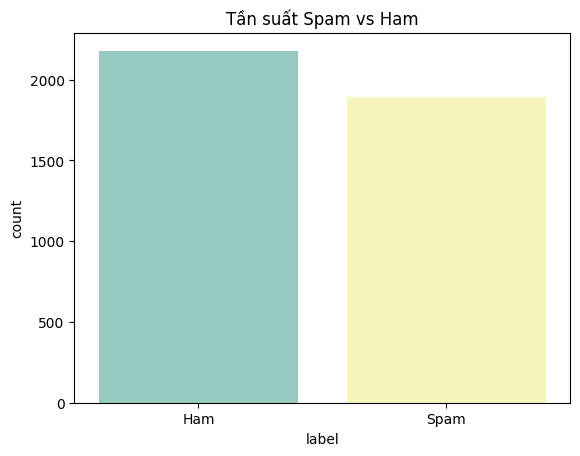

In [20]:
sns.countplot(x='label', data=data, palette='Set3')
plt.title("Tần suất Spam vs Ham")
plt.show()


In [21]:
data.isna().sum()

label    0
text     0
dtype: int64

In [22]:
data['text_length'] = data['text'].apply(len)

In [23]:
data.describe()

,text_length
count,4070.000000
mean,1946.918673
std,4753.543434
min,4.000000
25%,371.000000
50%,853.500000
75%,1925.500000
max,121208.000000


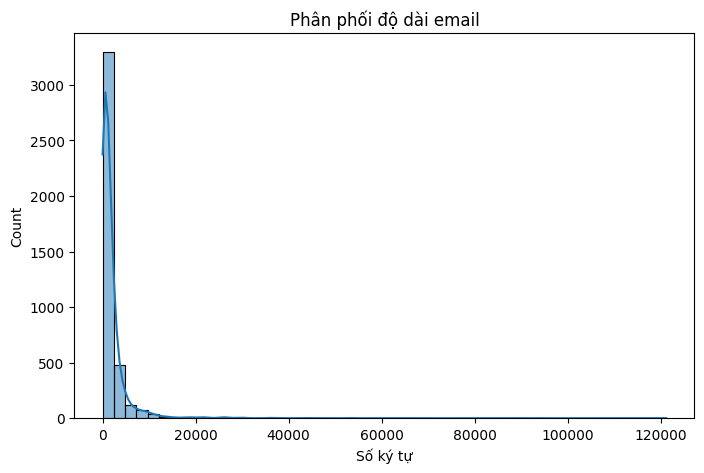

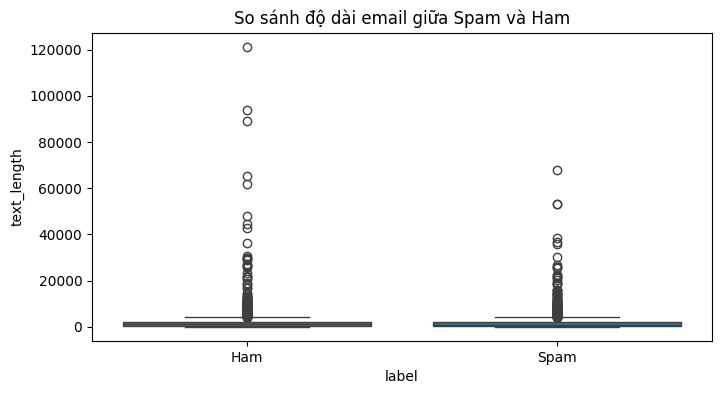

In [24]:

plt.figure(figsize=(8,5))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title("Phân phối độ dài email")
plt.xlabel("Số ký tự")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='text_length', data=data)
plt.title("So sánh độ dài email giữa Spam và Ham")
plt.show()


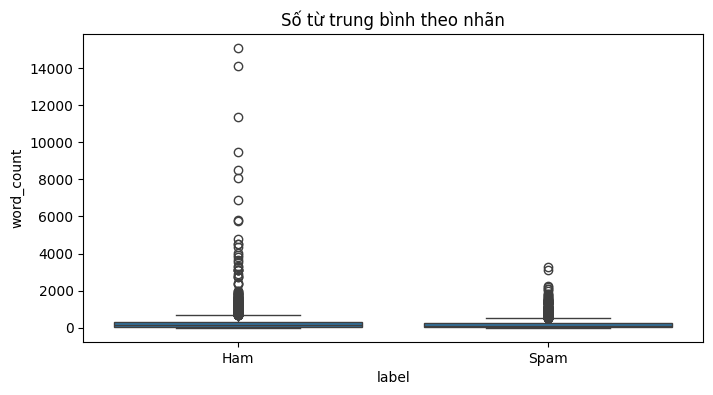

In [25]:
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='word_count', data=data)
plt.title("Số từ trung bình theo nhãn")
plt.show()


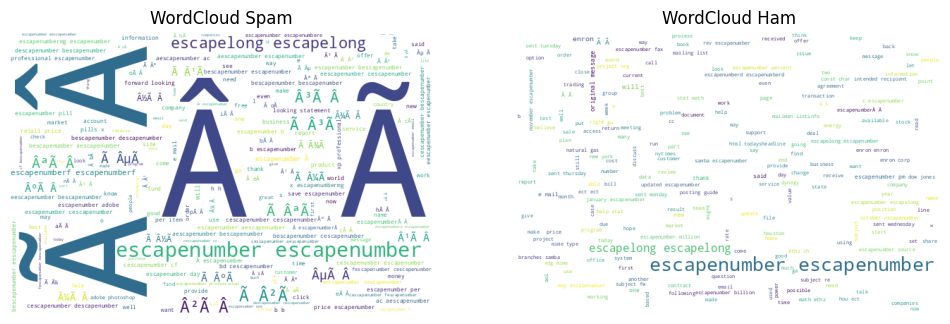

In [26]:
from wordcloud import WordCloud

spam_text = " ".join(data[data['label']=='Spam']['text'].values)
ham_text = " ".join(data[data['label']=='Ham']['text'].values)

wordcloud_spam = WordCloud(width=600, height=400, background_color='white').generate(spam_text)
wordcloud_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_spam)
plt.axis('off')
plt.title("WordCloud Spam")

plt.subplot(1,2,2)
plt.imshow(wordcloud_ham)
plt.axis('off')
plt.title("WordCloud Ham")
plt.show()


thêm 1 ham để so sánh

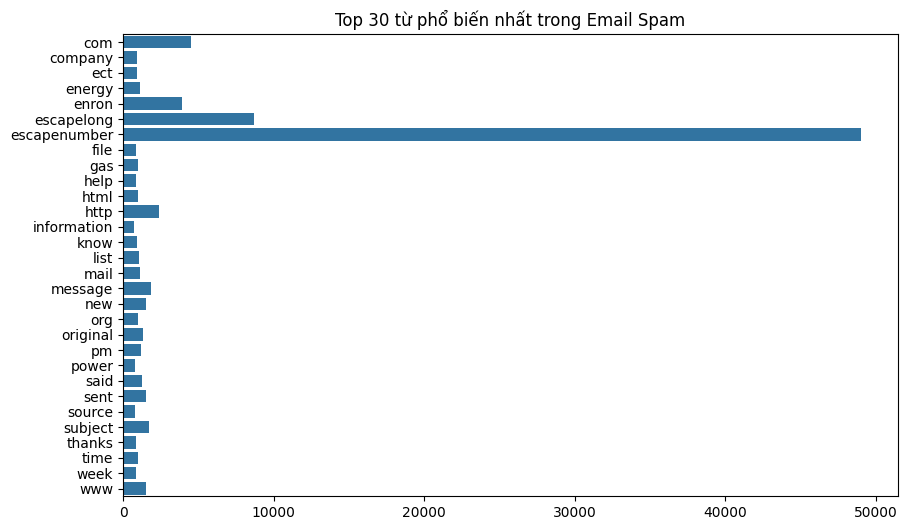

In [27]:

cv = CountVectorizer(stop_words='english', max_features=30)
X_counts = cv.fit_transform(data[data['label']=='Ham']['text'])
spam_words = np.sum(X_counts.toarray(), axis=0)

plt.figure(figsize=(10,6))
sns.barplot(x=spam_words, y=cv.get_feature_names_out())
plt.title("Top 30 từ phổ biến nhất trong Email Spam")
plt.show()


In [28]:
data['num_exclamation'] = data['text'].apply(lambda x: x.count('!'))
data['num_dollar'] = data['text'].apply(lambda x: x.count('$'))

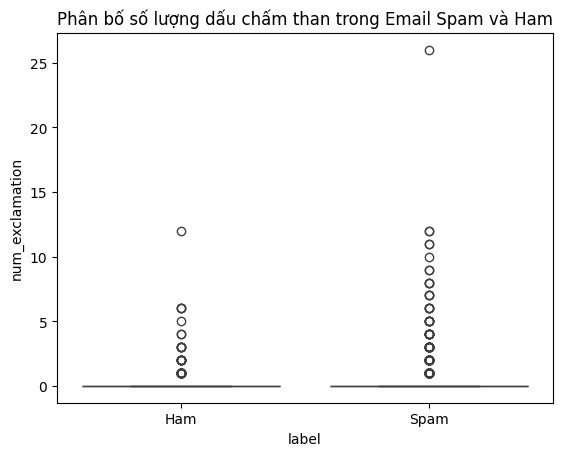

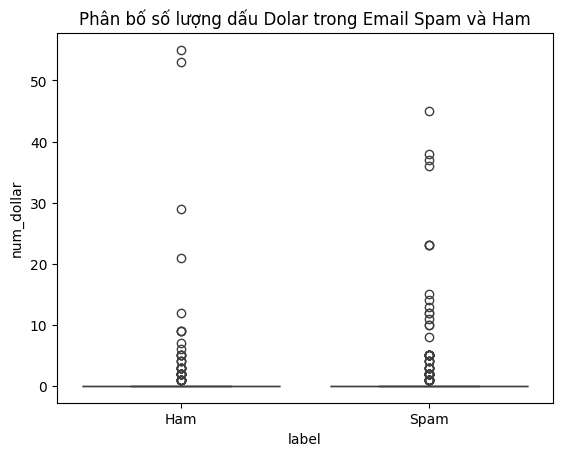

In [29]:
sns.boxplot(x='label', y='num_exclamation', data=data)
plt.title("Phân bố số lượng dấu chấm than trong Email Spam và Ham")
plt.show()

sns.boxplot(x='label', y='num_dollar', data=data)
plt.title("Phân bố số lượng dấu Dolar trong Email Spam và Ham")
plt.show()


In [30]:
data

,label,text,text_length,word_count,num_exclamation,num_dollar
0,Ham,at http samba sernet de ma bzr samba escapenum...,8659,1095,0,0
1,Ham,following please find daily enrononline execut...,145,18,0,0
2,Ham,you have received this email because the reque...,483,105,0,0
3,Ham,i need phone numbers for customers invited to ...,84,15,0,0
4,Spam,hi i am tired this afternoon i am escapenumber...,162,32,0,0
...,...,...,...,...,...,...
4065,Ham,think would good us settle standard level dail...,1916,255,0,0
4066,Ham,hi paul escapelong still oregon sunriver clean...,258,38,0,0
4067,Ham,on thu escapenumber jul escapenumber escapenum...,1034,167,0,0
4068,Spam,get all the software imaginable for bottom pri...,1196,147,0,0


In [ ]:
# nltk.download('stopwords')


NameError: name 'nltk' is not defined

In [34]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords

# Giả sử data đã load và có cột 'text'
stop_words = set(stopwords.words('english'))

def count_punctuation(text):
    return sum(text.count(ch) for ch in string.punctuation)

def count_digits(text):
    return sum(c.isdigit() for c in text)

def avg_word_len(text):
    words = text.split()
    return sum(len(w) for w in words) / len(words) if len(words) > 0 else 0

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords(text):
    words = text.lower().split()
    return sum(1 for w in words if w in stop_words)

def count_special_chars(text):
    return sum(1 for c in text if not c.isalnum() and not c.isspace())




In [35]:

data['text_length'] = data['text'].apply(len)
data['word_count'] = data['text'].apply(lambda x: len(x.split()))
data['num_exclamation'] = data['text'].apply(lambda x: x.count('!'))
data['num_dollar'] = data['text'].apply(lambda x: x.count('$'))
data['num_uppercase'] = data['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
data['num_punctuation'] = data['text'].apply(count_punctuation)
data['num_digits'] = data['text'].apply(count_digits)
data['avg_word_length'] = data['text'].apply(avg_word_len)
data['num_unique_words'] = data['text'].apply(count_unique_words)
data['num_stopwords'] = data['text'].apply(count_stopwords)
data['num_special_chars'] = data['text'].apply(count_special_chars)
data['num_hashtags'] = data['text'].apply(lambda x: x.count('#'))
data['num_mentions'] = data['text'].apply(lambda x: x.count('@'))
data['num_whitespaces'] = data['text'].apply(lambda x: sum(1 for c in x if c.isspace()))


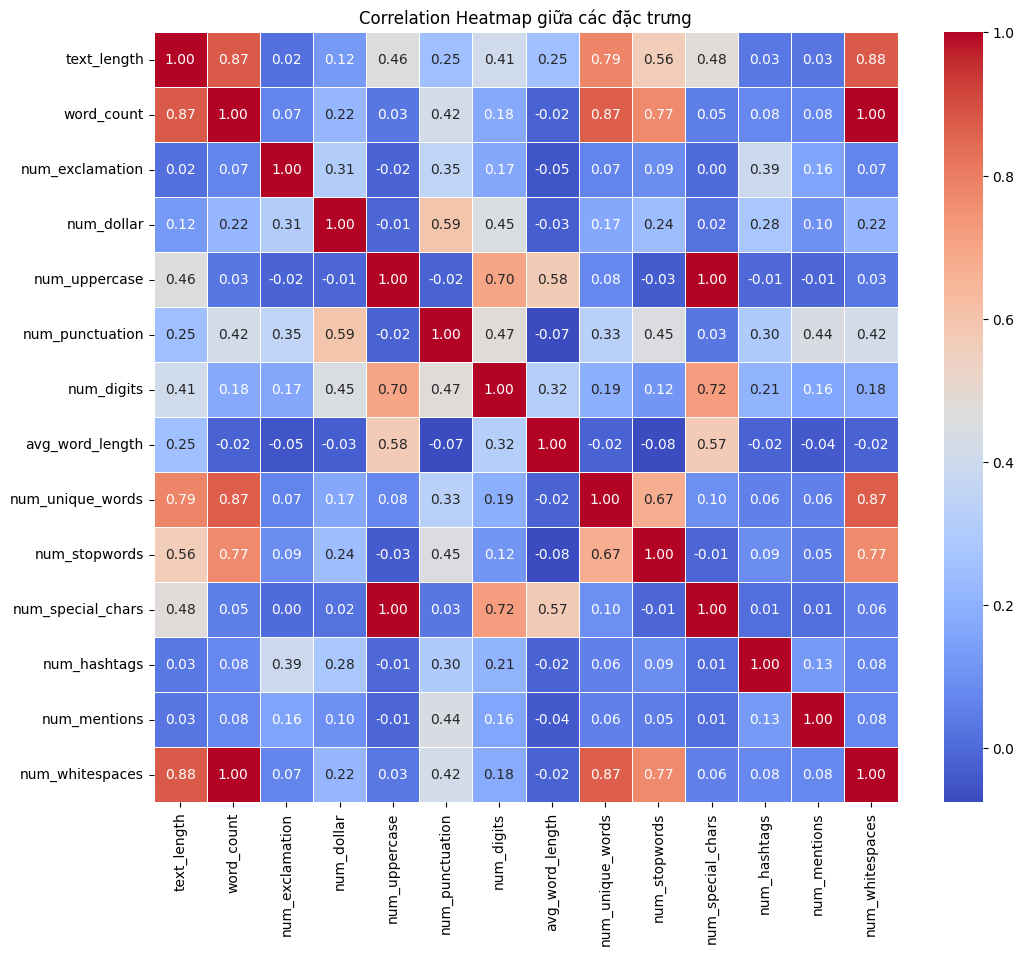

In [36]:

features = ['text_length', 'word_count', 'num_exclamation', 'num_dollar', 'num_uppercase',
            'num_punctuation', 'num_digits', 'avg_word_length', 'num_unique_words', 'num_stopwords',
            'num_special_chars', 'num_hashtags', 'num_mentions', 'num_whitespaces']

plt.figure(figsize=(12,10))
corr = data[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap giữa các đặc trưng")
plt.show()


Skewness của text_length: 11.51


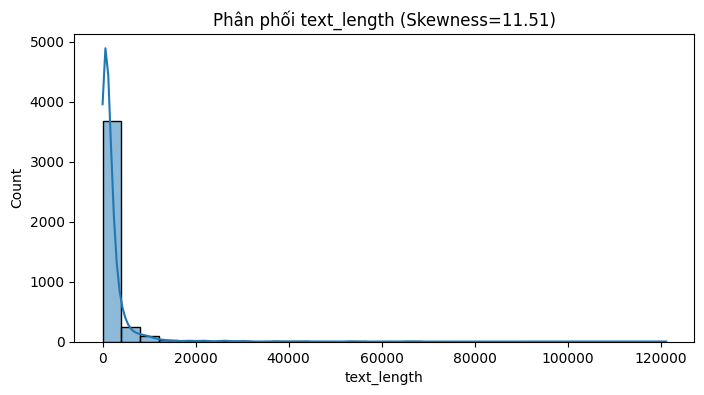

Skewness của word_count: 12.58


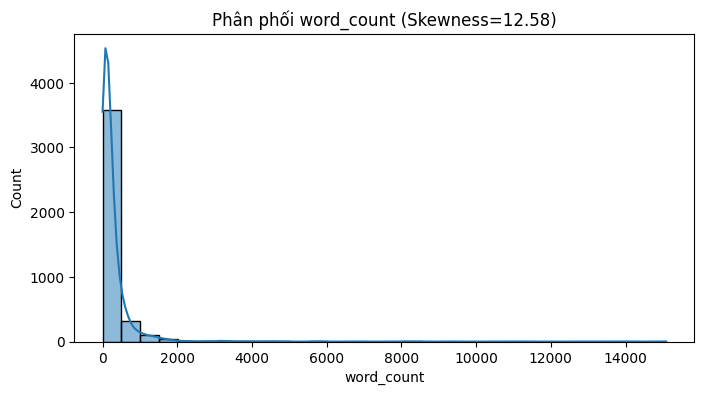

Skewness của num_exclamation: 12.73


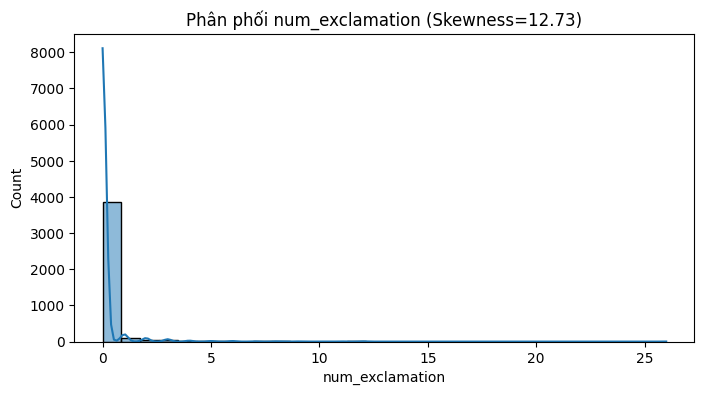

Skewness của num_dollar: 18.16


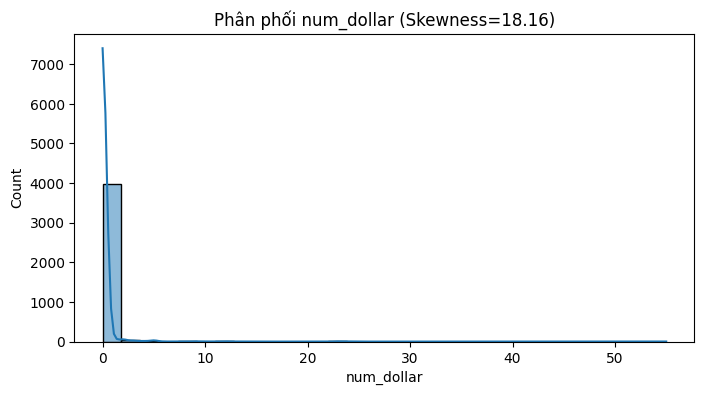

Skewness của num_uppercase: 17.32


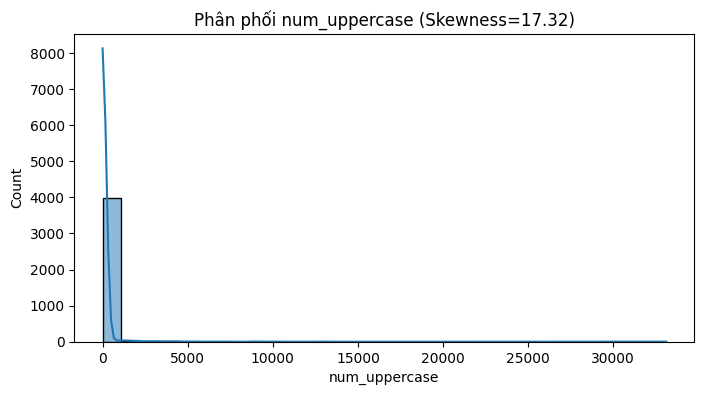

Skewness của word_count_log: -0.13


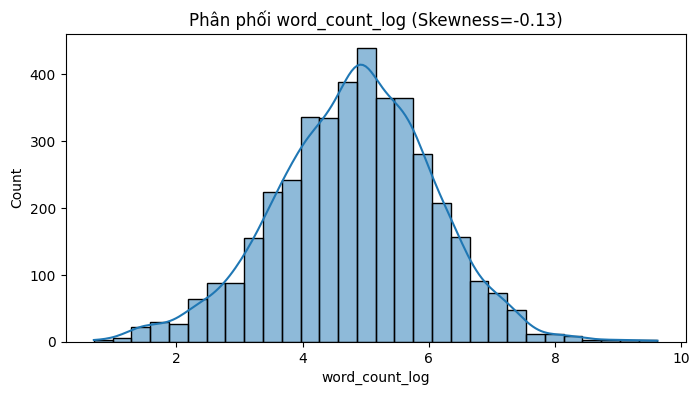

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = ['text_length', 'word_count', 'num_exclamation', 'num_dollar', 'num_uppercase']

# Tạo biến log để giảm độ lệch của word_count
data['word_count_log'] = np.log1p(data['word_count'])

# Thêm biến log vào danh sách để vẽ cùng
numeric_cols.append('word_count_log')

for col in numeric_cols:
    skewness = data[col].skew()
    print(f"Skewness của {col}: {skewness:.2f}")
    
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Phân phối {col} (Skewness={skewness:.2f})')
    plt.show()


In [ ]:
data

In [ ]:
# Lưu DataFrame ra file CSV mới
data.to_csv('data_spam_feature.csv', index=False)